**Experiment No. 5**

Principal component analysis (PCA) is a method of reducing the dimensionality of data and is used to improve data visualization and speed up machine learning model training.

For a lot of machine learning applications, it helps to visualize your data. Visualizing two- or three-dimensional data is not that challenging. However, even the Iris data set used in this part of the tutorial is four-dimensional. You can use PCA to reduce that four-dimensional data into two or three dimensions so that you can plot, and hopefully, understand the data better.

**Step 1: Load the Iris Data Set**

The iris data set comes with scikit-learn and doesn’t require you to download any files from some external websites. The code below will load the Iris data set.

**Step 2: Standardize the Data**
PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the data set’s features onto unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms. If you don’t scale your data, it can have a negative effect on your algorithm.

**Step 3: PCA Projection to 2D**
The original data has four columns (sepal length, sepal width, petal length and petal width). In this section, the code projects the original data, which is four-dimensional, into two dimensions. After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

**Step 4: Visualize 2D Projection**
This section is just plotting two-dimensional data. Notice on the graph below that the classes seem well separated from each other.

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


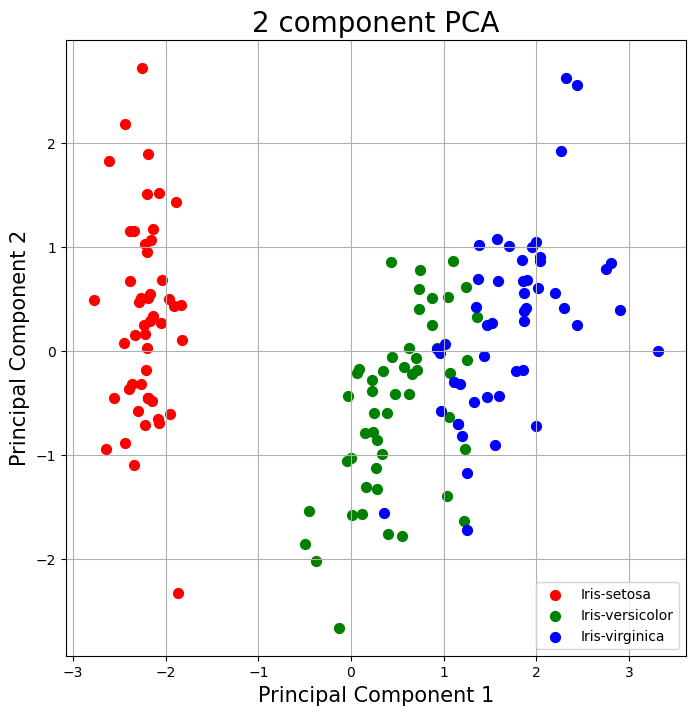

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

display(df)


features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



**Explained Variance**

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important because while you can convert four-dimensional space to a two-dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77 percent of the variance, and the second principal component contains 23.03 percent of the variance. Together, the two components contain 95.80 percent of the information.

In [2]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

**Problem for practice:** In the above code, the dataset link provided is for iris data. Try to choose other dataset and apply PCA over that data and anlyze the results.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


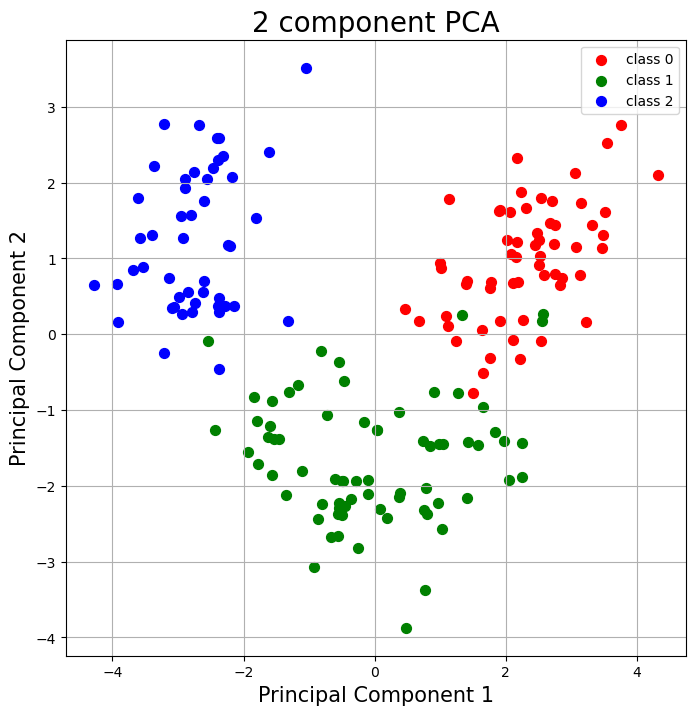

In [7]:
import pandas as pd  
from matplotlib import pyplot as plt  
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA  
from sklearn.datasets import load_wine  

# load Wine dataset  
wine = load_wine()  

# create a Pandas DataFrame  
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)  
df['target'] = wine.target  

display(df)  

features = wine.feature_names  

# Separating out the features  
x = df.loc[:, features].values  

# Separating out the target  
y = df.loc[:,['target']].values  

# Standardizing the features  
x = StandardScaler().fit_transform(x)  

pca = PCA(n_components=2)  

principalComponents = pca.fit_transform(x)  

principalDf = pd.DataFrame(data = principalComponents  
             , columns = ['principal component 1', 'principal component 2'])  

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)  

fig = plt.figure(figsize = (8,8))  
ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15)  
ax.set_ylabel('Principal Component 2', fontsize = 15)  
ax.set_title('2 component PCA', fontsize = 20)  

targets = [0, 1, 2]  
colors = ['r', 'g', 'b']  
for target, color in zip(targets,colors):  
    indicesToKeep = finalDf['target'] == target  
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']  
               , finalDf.loc[indicesToKeep, 'principal component 2']  
               , c = color  
               , s = 50)  
ax.legend(['class 0', 'class 1', 'class 2'])  
ax.grid()

In [8]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])